# Fourier spectrum of quantum models - Distance in Fourier space

Quantum models can be used to approximate real functions that take in one (or even several) real variables. But how good is this approximation? One way to measure the closeness of the approximate to the analytic function is by calculating the $\mathcal{l}^2$ distance in Fourier space, which we will define later. For the purposes of this challenge, we are interested in approximating a function $f:\mathbb{R}\rightarrow \mathbb{R}$ with discrete Fourier expansion

$$f(x) = \sum_{\omega=-3}^3 c_\omega e^{i\omega x}$$

where the $c_\omega$ are complex numbers knows as _Fourier coefficients_. We see that the function can be decomposed into sinusoidal waves of frequencies 0, 1, 2 or 3. An interesting result in quantum machine learning is that we can get such functions by using a model with an _in-parallel encoding block_ containing three $RX$ gates, one in each wire, as shown below:

<img src=" 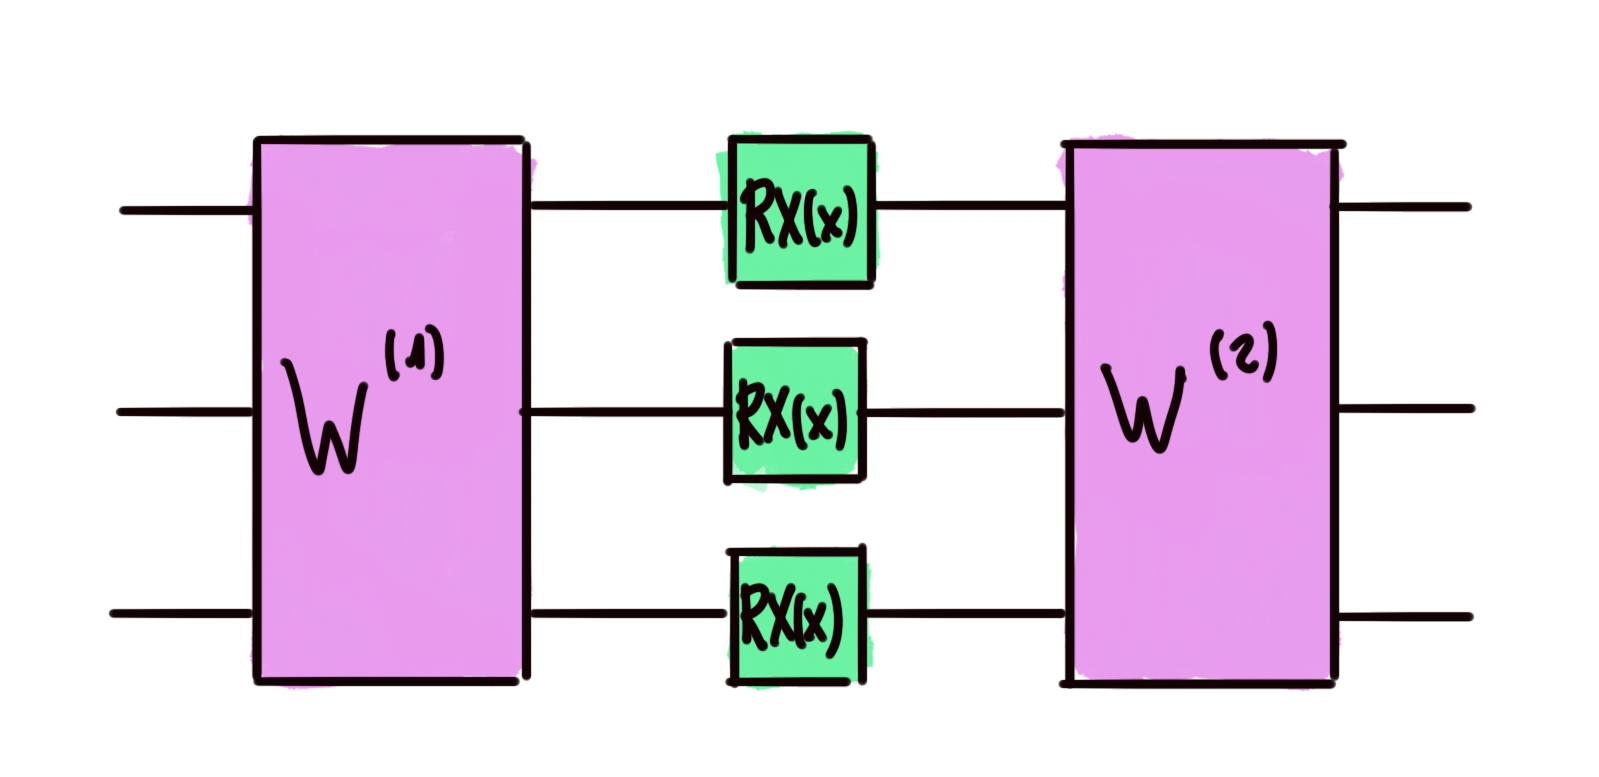">

where $x\in \mathbb{R}$ is the input data. Note that all rotation gates depend on the same $x$.

At the end, the expectation value of the Pauli-Z observable is calculated on the first wire. The _trainable circuit blocks_ $W^{(i)}$ depend on three parameters each, and correspond to a [_Basic Entangler_](https://docs.pennylane.ai/en/stable/code/api/pennylane.BasicEntanglerLayers.html?highlight=basicentangler#pennylane.BasicEntanglerLayers):

<img src=" 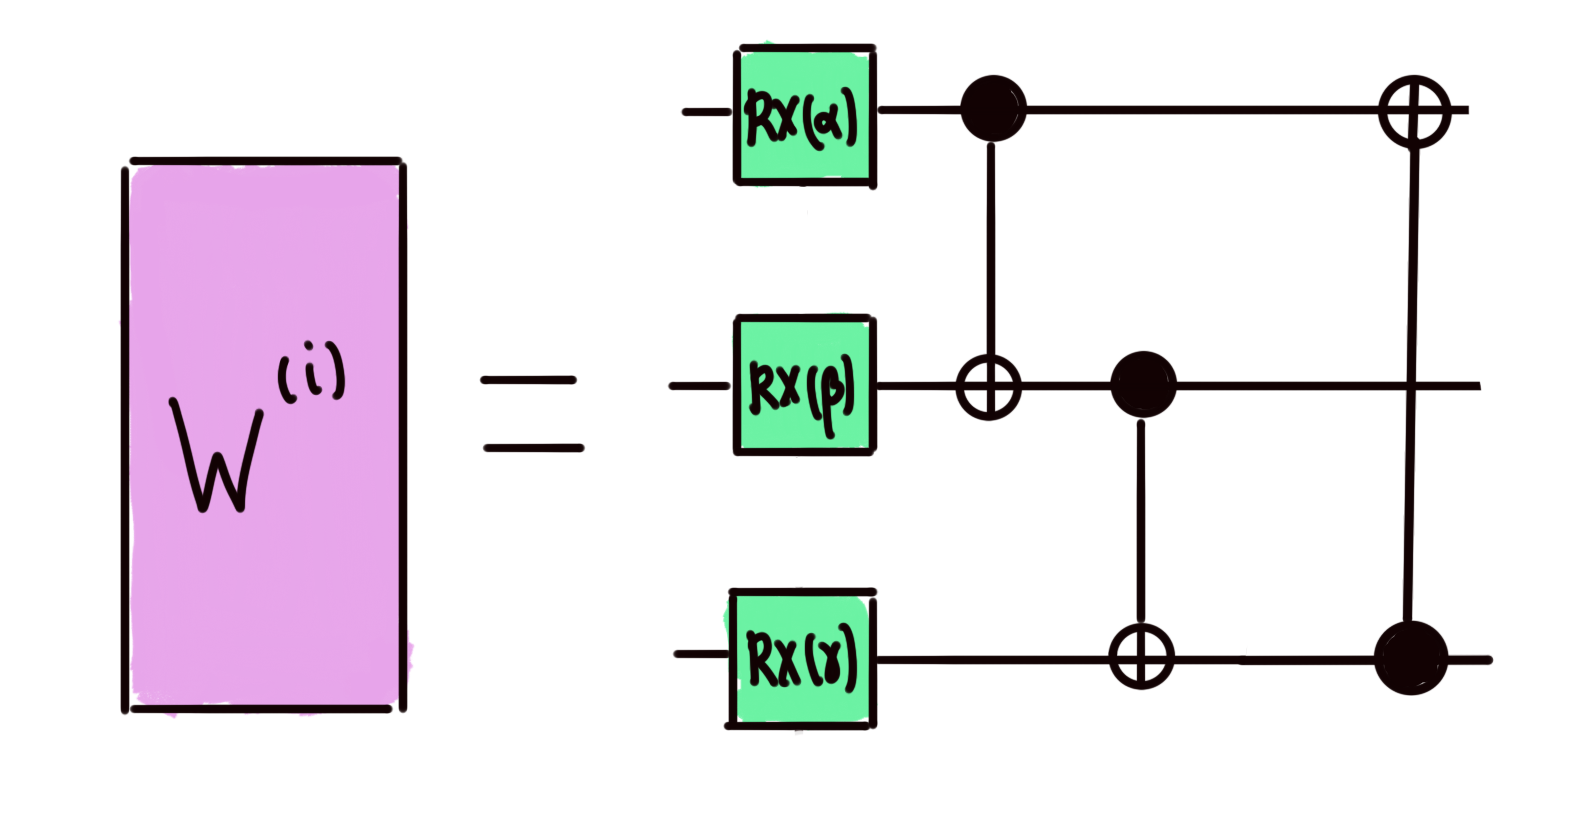">

Let us denote the output $\langle Z \rangle$ of the quantum model by $g_\theta(x)$, where $\theta$ is the set of parameters in the trainable circuit blocks. This real function has a Fourier expansion

$$g_\theta(x) = \sum_{\omega=-3}^3 b_\omega(\theta) e^{i\omega x}$$

Then the **squared** $\mathcal{l}^2$ distance in Fourier space between $f$ and $g_\theta$ is given by

$$d(f, g_\theta)^2 = \sum_{\omega=-3}^3 |c_\omega - b_\omega(\theta)|^2$$

Your task is to calculate this **squared distance**, given the coefficients $c_\omega$ of the function $f$ and the parameters $\theta$ of the circuit.

To accomplish this, you will need to find the *Fourier coefficients*_* of the quantum circuit. Check out PennyLane's Fourier module documentation to learn how!

## Challenge code

You must complete the `fourier_squared_distance` function return the squared $\mathcal{l}^2$ distance in Fourier space between the target function and our quantum model evaluated on some parameters $\theta$.



### Input

As input to this problem, you will be given:
- `list_of_coeffs` (list(np.complex)): List of seven elements representing the Fourier coefficients of $f$, in the conventional order $[c_0, c_1, c_2, c_3, c_{-3}, c_{-3}, c_{-1}]$.
- `param_list` (list(float)): List of the six parameters characterizing each of the two Basic Entanglers in our circuit. The first three elements are the parameters in the first entangler, from the top to the bottom wire. The last three elements correspond to the second entangler, with a similar wire order.



### Output

This code will output the squared distance, `float`, which is the distance in Fourier space between the target function and our quantum model.

If your solution matches the correct one within the given tolerance specified in `check` (in this case it's an absolute tolerance of `0.01`), the output will be `"Correct!"`. Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

In [ ]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy

In [ ]:
def fourier_squared_distance(list_of_coeffs, param_list):
    """
    Returns the squared l2-distance in Fourier space between a function
    characterized by its Fourier coefficients and the output of the
    quantum model

    Args:
        list_of coeffs (list(float)): A list of seven coefficients
                                      corresponding to the Fourier
                                      coefficients of the function we
                                      want to approximate
        param_list (list(float)): A list of six parameters characterizing
                                  the angles in the trainable circuit.

    Returns: (float): Squared l2-distance between the given function
                      and the output of the quantum model
    """

    dev = qml.device("default.qubit", wires=3)

    # Feel free to define any helper functions, such as subcircuits, here.
    def basic_entangler(params, index):
        for wire in range(3):
            qml.RX(params[index], wires = wire)
            index += 1

        qml.CNOT(wires = [0,1])
        qml.CNOT(wires = [1,2])
        qml.CNOT(wires = [2,0])
        return index
    
    @qml.qnode(dev)
    def circuit(param_list, x):
        """This circuit returns the PauliZ expectation of
        the quantum model in the statement"""
        # Put your code here #
        index = 0

        index = basic_entangler(param_list, index)

        for wire in range(3):
            qml.RX(x, wires = wire)

        index = basic_entangler(param_list, index)

        return qml.expval(qml.PauliZ(0))

    # just a trick, then compute the fourier coefficients
    partial_circuit = functools.partial(circuit, param_list)
    b = qml.fourier.coefficients(partial_circuit, 1, 3)
    
    # Write a function that calculates the squared l2-distance here
    # Return your final answer here
    return np.sum( np.absolute( list_of_coeffs - b )**2 )

In [ ]:
# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:

    ins = json.loads(test_case_input)
    output = fourier_squared_distance(*ins)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    """
    Compare solution with expected.

    Args:
            solution_output: The output from an evaluated solution. Will be
            the same type as returned.
            expected_output: The correct result for the test case.

    Raises:
            ``AssertionError`` if the solution output is incorrect in any way.
    """

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-2
    ), "Your calculated squared distance isn't quite right."


In [ ]:
test_cases = [['[[-1.12422548e-01,  0.0, 9.47909940e-02, 0.0, 0.0, 9.47909940e-02, 0.0],[2,2,2,3,4,5]]', '0.0036766085933034303'], ['[[-2.51161988e-01, 0.0, 1.22546112e-01, 0.0, 0.0,  1.22546112e-01, 0.0],[1.1,0.3,0.4,0.6,0.8,0.9]]', '0.6538589174369286']]

In [ ]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")